# WITH SEABORN

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [6]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [7]:
kill["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

<AxesSubplot:xlabel='gender', ylabel='age'>

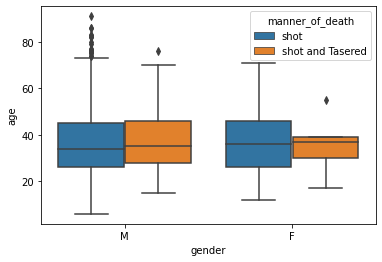

In [8]:
sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death")

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

In [10]:
kill[kill["gender"]=="F"]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
51,100,Kristiana Coignard,22/01/15,shot and Tasered,knife,17.0,F,W,Longview,TX,True,other,Not fleeing,False
60,20,Jessie Hernandez,26/01/15,shot,vehicle,17.0,F,H,Denver,CO,False,other,Not fleeing,False
67,111,Tiffany Terry,27/01/15,shot,knife,39.0,F,W,Omaha,NE,True,attack,Not fleeing,False
80,118,Yuvette Henderson,03/02/15,shot,gun,38.0,F,B,Emeryville,CA,False,attack,Car,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2743,Tiffany Lynn Potter,05/07/17,shot,gun,29.0,F,W,Des Moines,IA,False,attack,Foot,True
2474,2760,Tina Medlin,08/07/17,shot,gun,50.0,F,W,Newton Grove,NC,False,attack,Not fleeing,False
2494,2779,Justine Damond,15/07/17,shot,unarmed,40.0,F,W,Minneapolis,MN,False,undetermined,Not fleeing,False
2497,2782,India N. Nelson,17/07/17,shot,gun,25.0,F,NaN,Norfolk,VA,False,attack,Not fleeing,False


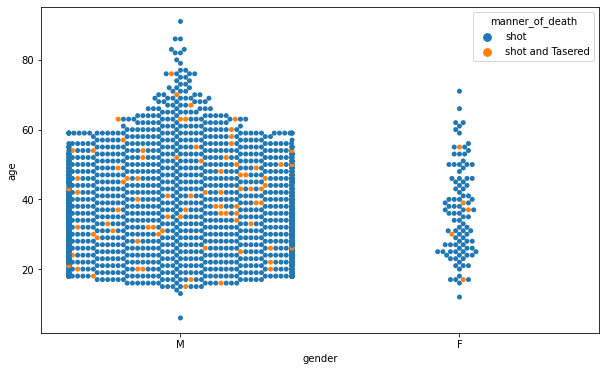

In [11]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="gender", y="age", data=kill, hue="manner_of_death");

## 2: Plot 12 most dangerous cities

In [13]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [14]:
city_freq = kill["city"].value_counts()[:12]
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

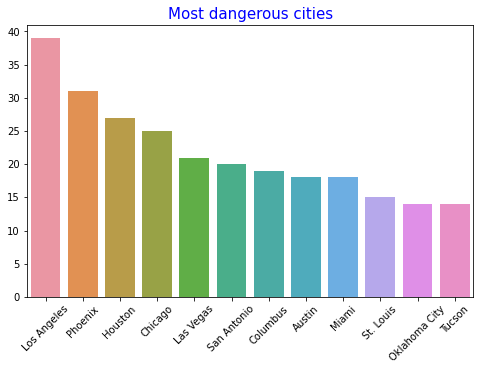

In [16]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=city_freq.index, y=city_freq)
ax.set_title("Most dangerous cities", color="b", fontsize=15)
ax.set_xticklabels(labels=city_freq.index,rotation=45)
plt.ylabel("");


In [19]:
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

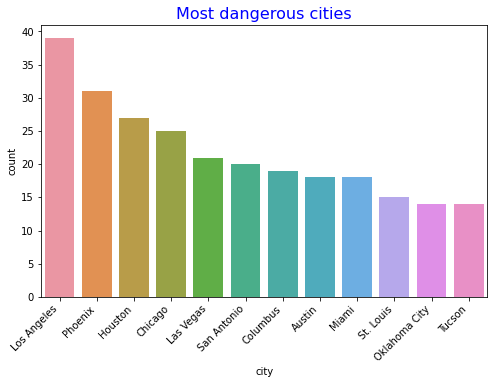

In [31]:
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="city", data = kill.loc[kill.city.isin(city_freq.index)], order = city_freq.index)
ax.set_xticklabels(labels=city_freq.index,rotation=45, ha='right')
ax.set_title("Most dangerous cities", fontsize=16, color="Blue")

plt.show()

## 3: Plot 20 most dangerous states

In [22]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [23]:
state_freq = kill["state"].value_counts()[:20]
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

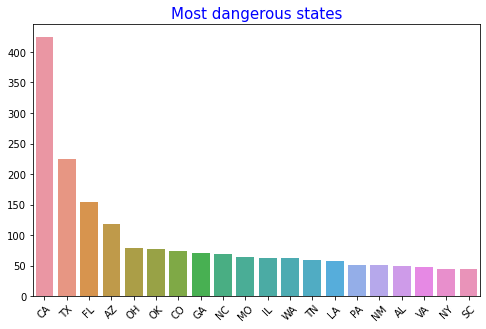

In [25]:
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=state_freq.index, y=state_freq)
ax.set_title("Most dangerous states", color="b", fontsize=15)
ax.set_xticklabels(labels=state_freq.index,rotation=45);
plt.ylabel("");

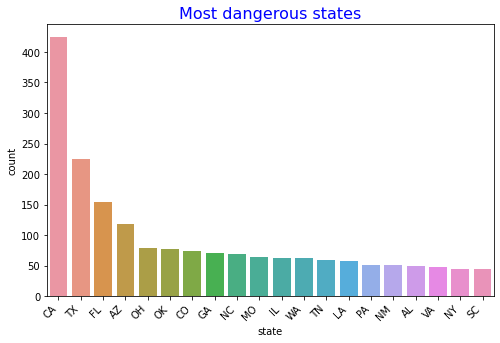

In [26]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="state", data = kill.loc[kill.state.isin(state_freq.index)], order = state_freq.index)
ax.set_xticklabels(labels=state_freq.index,rotation=45, ha='right')
ax.set_title("Most dangerous states", fontsize=16, color="Blue")

plt.show()

## 4: Plot Having mental ilness or not for killed people

In [97]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [98]:
illness = kill["signs_of_mental_illness"].value_counts()
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

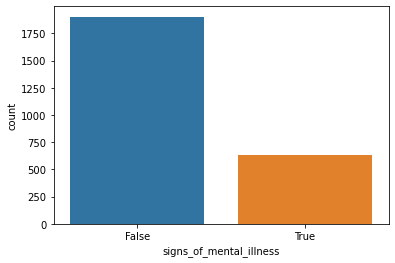

In [111]:
sns.countplot(x="signs_of_mental_illness", data=kill);

## 5: Plot number of Threat Types

In [113]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [114]:
threads_freq = kill["threat_level"].value_counts()
threads_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

<AxesSubplot:xlabel='threat_level', ylabel='count'>

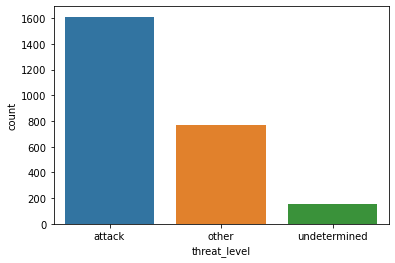

In [115]:
sns.countplot(x="threat_level", data=kill)

## 6: Plot number of Flee Types

In [116]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [117]:
flee_freq = kill["flee"].value_counts()
flee_freq

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

<AxesSubplot:xlabel='flee', ylabel='count'>

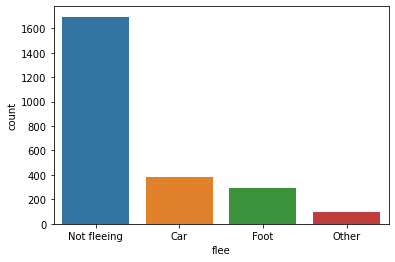

In [118]:
sns.countplot(x="flee", data=kill)